In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf

In [4]:
tf.__version__

'2.4.4'

In [5]:
mnist = tf.keras.datasets.mnist

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 3s 0us/step


In [11]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [12]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.76480716, -0.69049954, -0.6823444 ,  0.09689973,  0.45827216,
        -0.23839718,  0.205401  ,  0.18324575, -0.8623942 ,  0.7430562 ]],
      dtype=float32)

In [13]:
tf.nn.softmax(predictions).numpy()

array([[0.04702776, 0.05065539, 0.05107019, 0.111324  , 0.15978311,
        0.07961067, 0.12408244, 0.1213636 , 0.04265527, 0.21242763]],
      dtype=float32)

In [14]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


In [15]:
loss_fn(y_train[:1], predictions).numpy()


2.5306072

In [16]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])


In [17]:
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4799 - accuracy: 0.8593
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1544 - accuracy: 0.9549
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1108 - accuracy: 0.9679
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0910 - accuracy: 0.9729
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0795 - accuracy: 0.9769


In [18]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0734 - accuracy: 0.9773


[0.07342039048671722, 0.9772999882698059]

In [19]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [20]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[5.3325046e-08, 2.8153595e-08, 4.2096963e-05, 6.8184495e-04,
        1.3434530e-11, 4.1878525e-07, 1.0231643e-12, 9.9927431e-01,
        8.2829933e-07, 3.0515460e-07],
       [3.4997740e-08, 3.1513729e-04, 9.9952114e-01, 1.3690135e-04,
        6.9117748e-13, 1.5989042e-05, 1.0965876e-07, 1.6409508e-10,
        1.0669124e-05, 2.5090353e-12],
       [1.0889717e-06, 9.9809855e-01, 2.3320541e-04, 1.0303055e-05,
        2.7063461e-05, 2.0977421e-05, 1.1688772e-05, 1.4193362e-03,
        1.7755431e-04, 2.3787923e-07],
       [9.9992704e-01, 5.4899036e-08, 4.9432325e-05, 9.5224788e-09,
        7.8594056e-09, 5.7956936e-07, 7.9628990e-06, 1.4436050e-05,
        9.8185211e-08, 3.1363763e-07],
       [2.9442032e-05, 1.6279216e-07, 2.0743959e-05, 1.5505091e-06,
        9.7020715e-01, 3.0978510e-06, 2.9673063e-05, 2.4832680e-04,
        1.4960876e-05, 2.9444780e-02]], dtype=float32)>

In [21]:
predictions = probability_model.predict(x_test)

In [22]:
predictions[0]

array([5.3324943e-08, 2.8153648e-08, 4.2096963e-05, 6.8184530e-04,
       1.3434530e-11, 4.1878525e-07, 1.0231663e-12, 9.9927431e-01,
       8.2829933e-07, 3.0515488e-07], dtype=float32)

In [23]:
np.argmax(predictions[0])

7

In [24]:
x_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [25]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


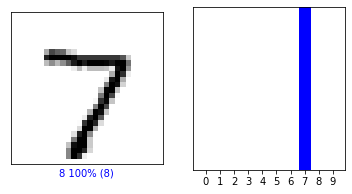

In [29]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

In [32]:
class_names = ['0','1','2','3','4','5','6','7','8','9']


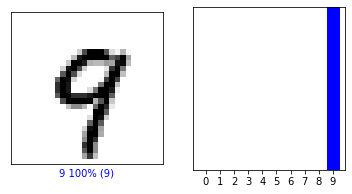

In [33]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

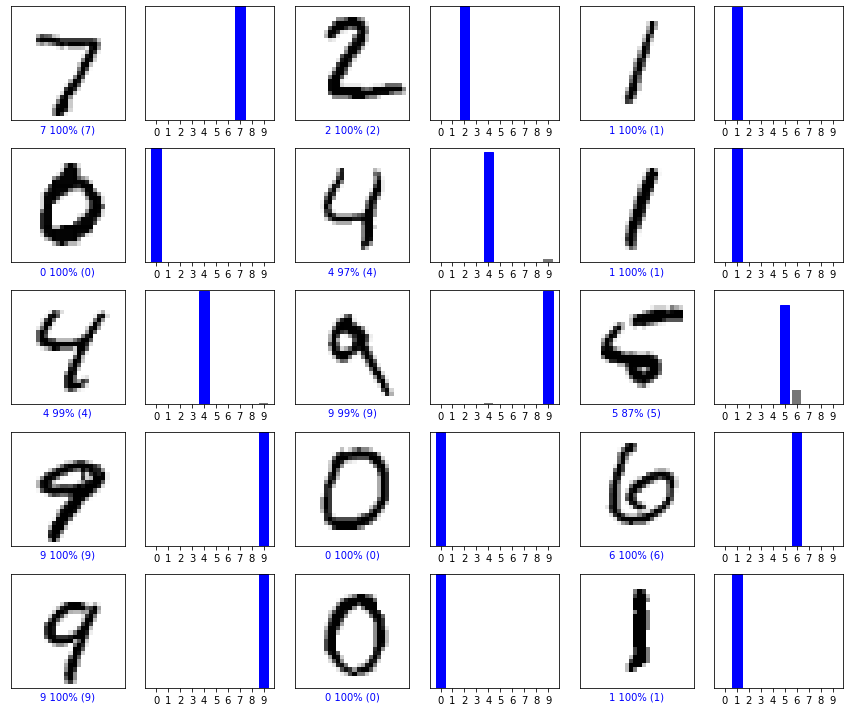

In [34]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

In [35]:
# Grab an image from the test dataset.
img = x_test[1]

print(img.shape)

(28, 28)


In [36]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [37]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.4997672e-08 3.1513697e-04 9.9952114e-01 1.3690122e-04 6.9117482e-13
  1.5989011e-05 1.0965834e-07 1.6409508e-10 1.0669114e-05 2.5090353e-12]]


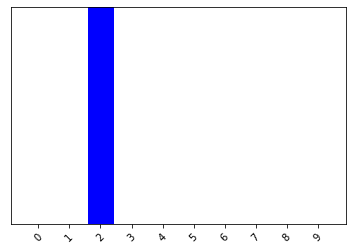

In [39]:
plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [40]:
np.argmax(predictions_single[0])

2

In [44]:
import psutil
psutil.cpu_percent()


1.7

In [45]:
psutil.virtual_memory()


svmem(total=1081514258432, available=1024321605632, percent=5.3, used=58597588992, free=935166513152, active=45286871040, inactive=63530778624, buffers=1191936, cached=87748964352, shared=403750912, slab=16187326464)

In [46]:
dict(psutil.virtual_memory()._asdict())


{'total': 1081514258432,
 'available': 1024352935936,
 'percent': 5.3,
 'used': 58607460352,
 'free': 935203512320,
 'active': 45294034944,
 'inactive': 63486967808,
 'buffers': 1191936,
 'cached': 87702093824,
 'shared': 362569728,
 'slab': 16186855424}

In [47]:
psutil.virtual_memory().percent


5.3

In [48]:
psutil.virtual_memory().available * 100 / psutil.virtual_memory().total

94.71133232594397

In [42]:
%pip install psutil

     |████████████████████████████████| 283 kB 224 kB/s            
Note: you may need to restart the kernel to use updated packages.


In [49]:
!nvidia-smi

/usr/bin/sh: nvidia-smi: command not found


In [50]:
import torch

# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

Using device: cpu



In [51]:
%pip install gputil
#!pip install psutil
%pip install humanize

  Preparing metadata (setup.py) ... done
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7409 sha256=cf77cf2faaa4ecf68c03441e9e9d89060b18f71cf72273a6e36d9d2eced6a04e
  Stored in directory: /home/build/.cache/pip/wheels/ba/03/bb/7a97840eb54479b328672e15a536e49dc60da200fb21564d53
Successfully built gputil
Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 98 kB 298 kB/s            
Note: you may need to restart the kernel to use updated packages.


In [52]:
# Import packages
import os,sys,humanize,psutil,GPUtil

# Define function
def mem_report():
  print("CPU RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ))
  
  GPUs = GPUtil.getGPUs()
  for i, gpu in enumerate(GPUs):
    print('GPU {:d} ... Mem Free: {:.0f}MB / {:.0f}MB | Utilization {:3.0f}%'.format(i, gpu.memoryFree, gpu.memoryTotal, gpu.memoryUtil*100))
    
# Execute function
# mem_report()

In [53]:
import torchvision.models as models

wide_resnet50_2 = models.wide_resnet50_2(pretrained=True)
if torch.cuda.is_available():
  resnet18.cuda()

mem_report()

Downloading: "https://download.pytorch.org/models/wide_resnet50_2-95faca4d.pth" to /home/build/.cache/torch/hub/checkpoints/wide_resnet50_2-95faca4d.pth


  0%|          | 0.00/132M [00:00<?, ?B/s]

CPU RAM Free: 1.0 TB


In [56]:
%pip install ipyexperiments

     |████████████████████████████████| 46 kB 200 kB/s            
Note: you may need to restart the kernel to use updated packages.


In [66]:
from ipyexperiments import IPyExperimentsCPU

In [67]:
exp1 = IPyExperimentsCPU()


*** Experiment started with the CPU-only backend


*** Current state:
RAM:       Used       Free      Total          Util
CPU:      1,521    976,422  1,031,412 MB   0.15% 


･ RAM:  △Consumed    △Peaked    Used Total | Exec time 0:00:00.000
･ CPU:          0          0      1,521 MB |


In [63]:
%gpustat --debug

UsageError: Line magic function `%gpustat` not found.


In [71]:
exp1 = IPyExperimentsCPU()
cpu_data = exp1.data.cpu

exp2 = IPyExperimentsPytorch()
cpu_data = exp2.data.cpu
#gpu_data = exp2.data.gpu


*** Experiment started with the CPU-only backend


*** Current state:
RAM:       Used       Free      Total          Util
CPU:      1,521    976,304  1,031,412 MB   0.15% 


･ RAM:  △Consumed    △Peaked    Used Total | Exec time 0:00:00.156
･ CPU:          0          0      1,521 MB |

IPyExperimentsCPU: Finishing

*** Experiment finished in 00:00:11 (elapsed wallclock time)

*** Experiment memory:
RAM: Consumed       Reclaimed
CPU:        0        0 MB (100.00%)

*** Current state:
RAM:       Used       Free      Total          Util
CPU:      1,521    976,304  1,031,412 MB   0.15% 




NVMLError_LibraryNotFound: NVML Shared Library Not Found

･ RAM:  △Consumed    △Peaked    Used Total | Exec time 0:00:00.156
･ CPU:          0          0      1,521 MB |


In [72]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

･ RAM:  △Consumed    △Peaked    Used Total | Exec time 0:00:00.000
･ CPU:          0          0      1,521 MB |


UsageError: Line magic function `%tensorflow_version` not found.


In [73]:
%tensorflow_version 2.x
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

･ RAM:  △Consumed    △Peaked    Used Total | Exec time 0:00:00.000
･ CPU:          0          0      1,521 MB |


UsageError: Line magic function `%tensorflow_version` not found.
